# Load all necessary imports

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.decomposition import TruncatedSVD, PCA

# Fetch the California Housing dataset

In [2]:
# View the supported methods
cal_housing = fetch_california_housing()
dir(cal_housing)

['DESCR', 'data', 'feature_names', 'target']

## Get description of the dataset

In [3]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Load Target and Predictive Features

In [4]:
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

## Get both the target and predictive features as a single dataframe

In [7]:
data = X.copy()
data['MedVal'] = y
print(data.shape)
data.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Explaratory Data Analysis

Explaratory data analysis helps us understand the dataset we're dealing with. 

Includes checking on the shape of the dataset, descriptive statistics, feature correlations, visualization of distributions etc

## Check the shape of X

In [8]:
X.shape

(20640, 8)

## Get the columns in X

In [9]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

## Check the type of the columns in X

In [10]:
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

## Get information about the columns in X

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


## Generate Descriptive statistics of the predictive features

In [12]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


From the descriptive statistics generated above, we notice that some features have high deviations as compared to others e.g population. Additionally, the min and max values of the features indicate that they are not in the same scale especially population. These features may may make our model inaccurate if not scaled. To visually see this, we can plot a boxplot.

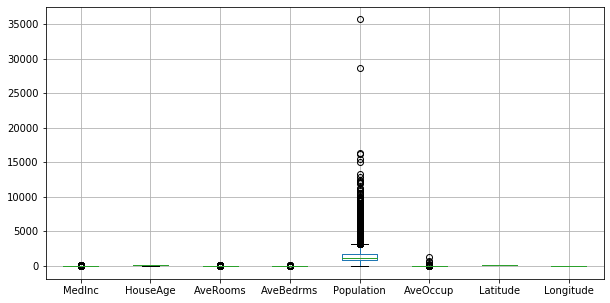

In [13]:
X.boxplot(figsize=(10, 5))

## Check distribution of features in X

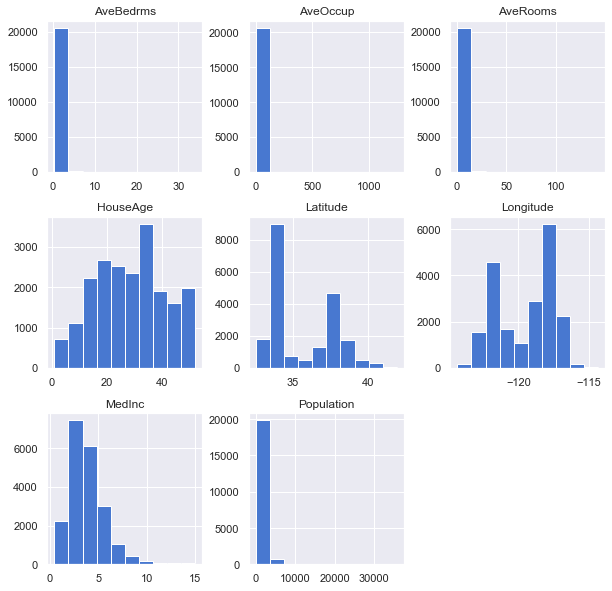

In [14]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
X.hist(figsize=(10,10))
plt.show()

Some features are skewed. Some models assume our features are normally distributed hence we may need to transform the features before modelling.

## Check correlation of features in X

In [15]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


### Visually see the correlation between the predictive features

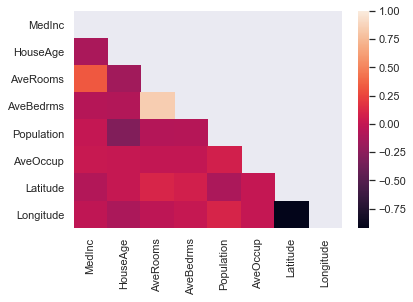

In [16]:
# Create the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle - to remove the repetetive values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask)
plt.show()

From the above heatmap, there's high correlation between these features:
    
- AveBedrms and AveRooms
- Latitude and Longitude

## Plot pairwise relationships of all attibutes 

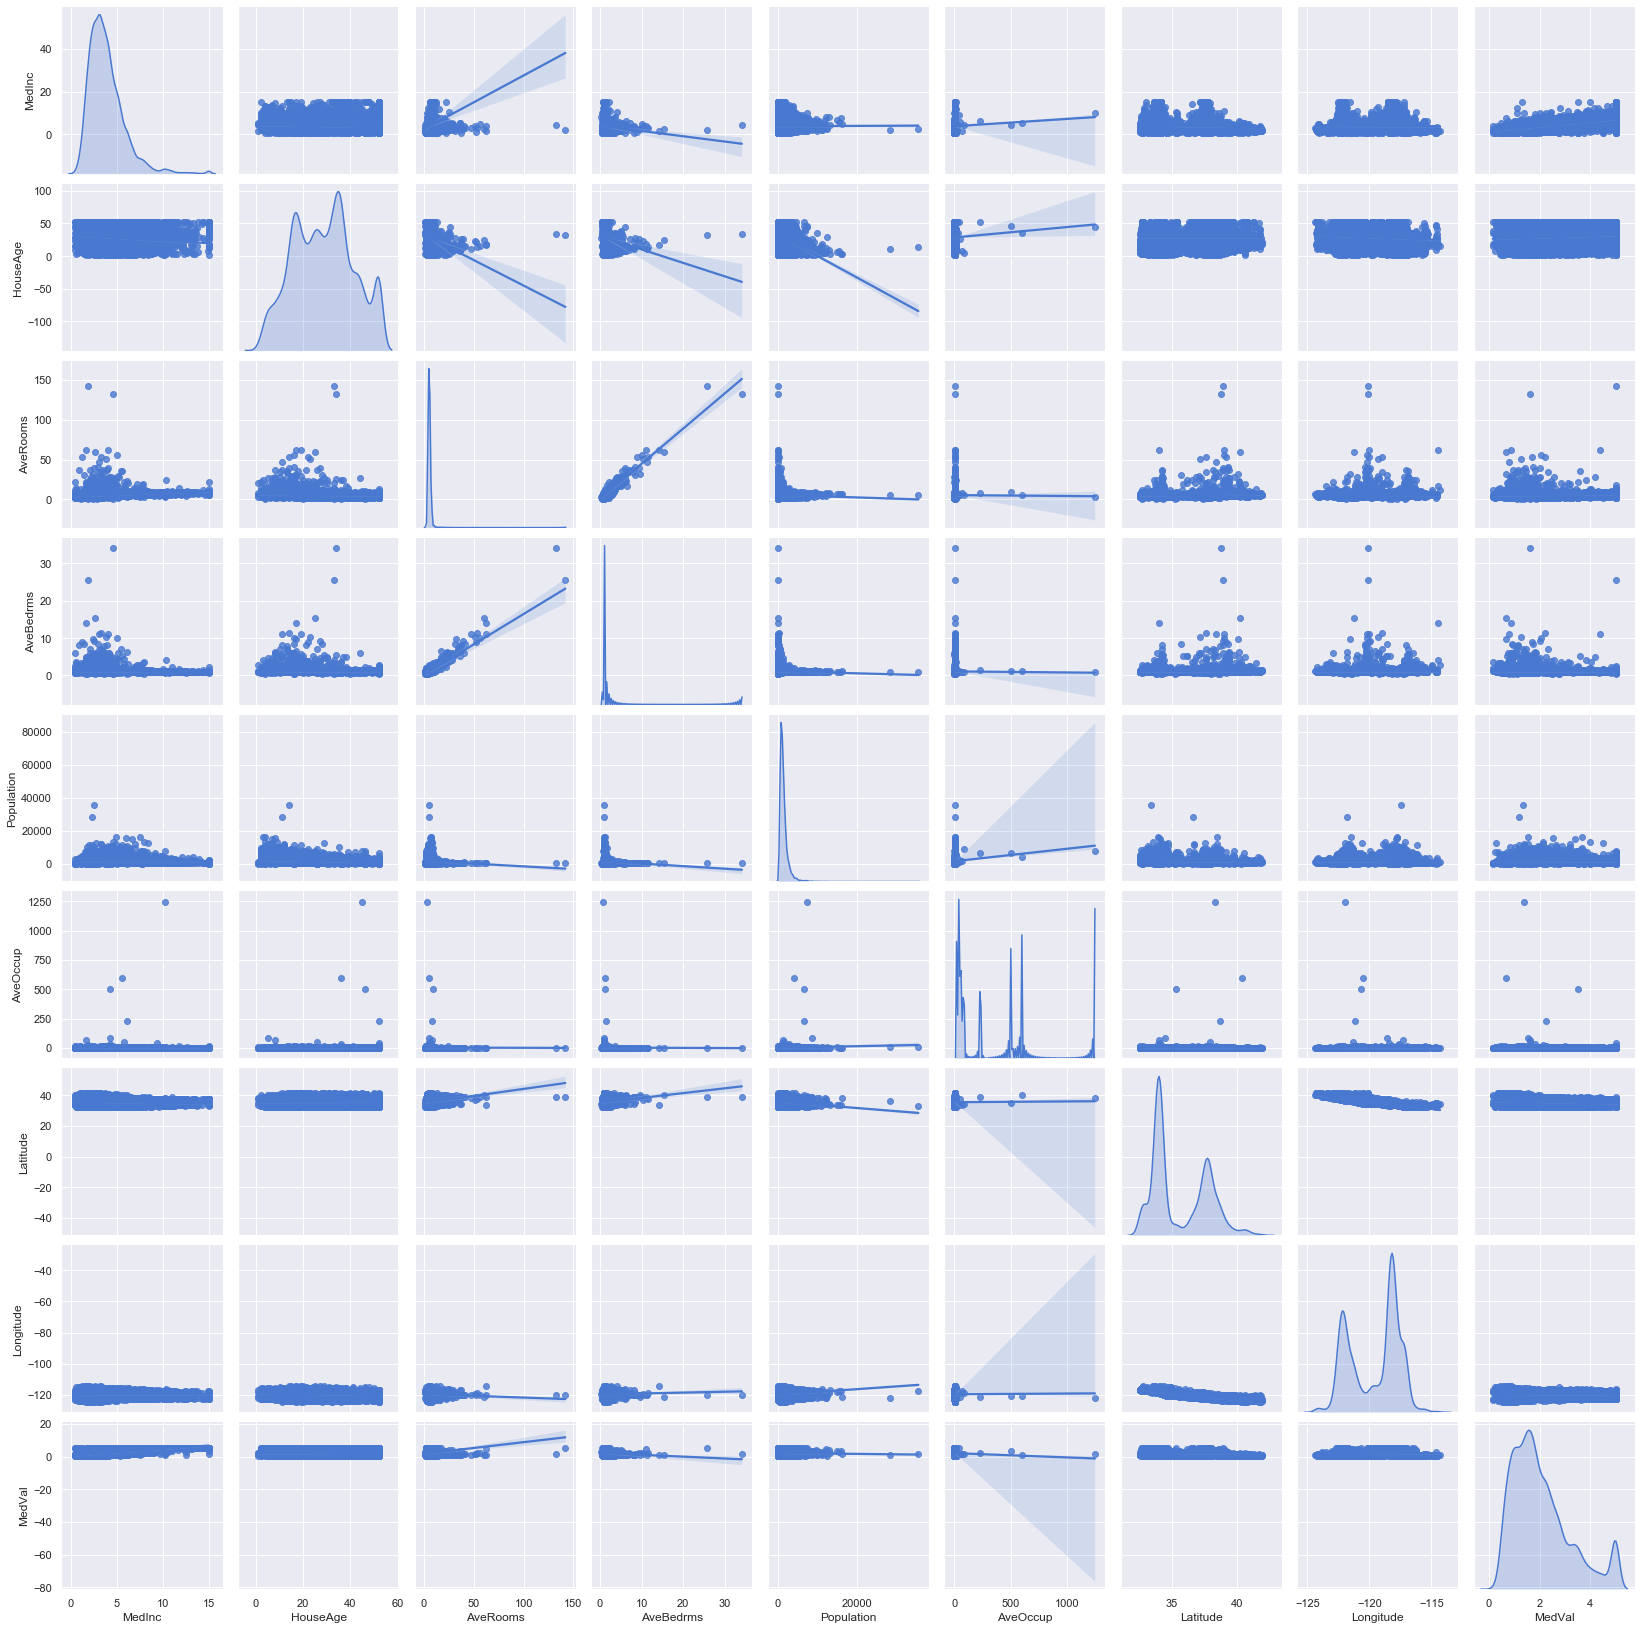

In [17]:
sns.pairplot(data, kind='reg', diag_kind='kde')

From the KDE plots in the diagnol we can see that some features are skewed. These would require some form of transformation e.g powertransformer which would make them normally distributed.

We also notice correlation between features e.g AveRooms and AveBedrms, also between latitude and longitude.

## Check for nulls in Predictive features

In [18]:
X.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

## Check for nulls in target

In [19]:
pd.DataFrame(y).isnull().any()

0    False
dtype: bool

# Create base models

In [20]:
lin_reg = LinearRegression()
lasso = Lasso(random_state=1)
lasso_reg = LassoCV(random_state=1)
ridge_reg = Ridge(random_state=1)
elastic_reg = ElasticNet(random_state=1)
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
xgbr = XGBRegressor(random_state=1)
models = [lin_reg, lasso, lasso_reg, ridge_reg, elastic_reg, dtr, rfr, xgbr]
model_names = ['LinearRegression', 'Lasso', 'LassoCV', 'Ridge', 'ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']

## Split data into train and test 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Get base models train and test scores

This helps check on over and under fitting by the base models.

In [22]:
# define function to calculate train and test scores
def get_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

### Get train and test scores in a pandas dataframe

In [23]:
train_scores = []
test_scores = []
scores_df = pd.DataFrame(columns=['Train score', 'Test score'], index=model_names)
# define function that fits the model and gets the train and test scores
def fit_score(X_train, X_test, y_train, y_test):
        for model in models:
            print(model, '\n')
            train_score, test_score = get_scores(model, X_train, X_test, y_train, y_test)
            train_scores.append(train_score)
            test_scores.append(test_score)
        scores_df['Train score'] = train_scores
        scores_df['Test score'] = test_scores
        # empty the lists since we'll reuse them
        train_scores.clear()
        test_scores.clear()
        return scores_df

fit_score(X_train, X_test, y_train, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False) 

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=Non

,Train score,Test score
LinearRegression,0.608897,0.594323
Lasso,0.294358,0.280957
LassoCV,0.592969,0.570985
Ridge,0.608897,0.594308
ElasticNet,0.429853,0.409049
DecisionTreeRegressor,1.000000,0.578448
RandomForestRegressor,0.972893,0.800490
XGBRegressor,0.804196,0.779971


From the initial modelling:

- LinearRegression, LassoCV, Ridge and ElasticNet underfit hence perform poorly on both train and test sets.

- DecisionTreeRegressor, RandomForestRegressor and XGBRegressor overfit hence perform better in train set than in test set.


# Normalize and scale the data
This is because most machine learning models assume the features are on the same scale and are normally distributed. Tree based models are however an exception.

We'll fit the transformer on train data then use it to transform both the train and test data. This helps avoid the train test contamination which may be caused by fitting the transformer on all the data.

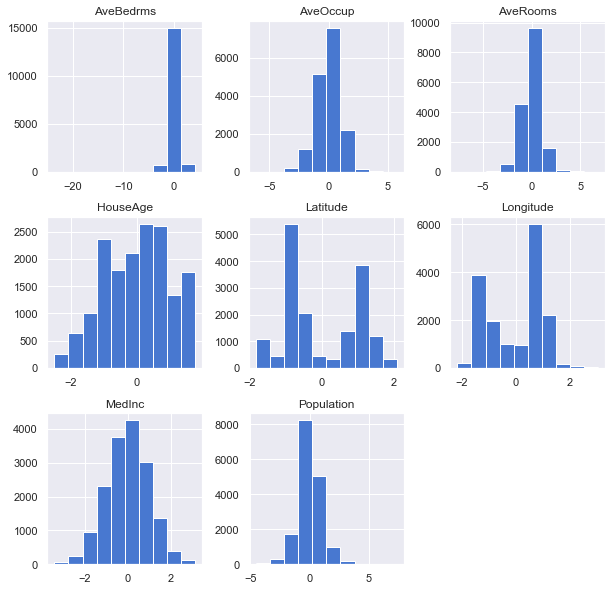

In [24]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the X training data
pow_trans.fit(X_train)

# Apply the power transform to the X train and X test data
X_train_normalized = pow_trans.transform(X_train)
X_test_normalized = pow_trans.transform(X_test)

# Train the transform on the y test data
pow_trans.fit(pd.DataFrame(y_train))

# Apply the power transform to the y train and y test data
y_train_normalized = pd.DataFrame(pow_trans.transform(pd.DataFrame(y_train)))
y_test_normalized = pd.DataFrame(pow_trans.transform(pd.DataFrame(y_test)))

# Get the normalized dataframes
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns, index=X_test.index)
# Plot the data after the transformation
X_train_normalized.hist(figsize=(10,10))
plt.show()

The distributions now appear normally distributed. AveBedrms however still seems to to skewed. This may be becaused by presence of outliers. 

## Retrain the models and check on the train and test scores after normalization and scaling

In [25]:
fit_score(X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False) 

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best') 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
               

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1) 

[20:30:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train score,Test score
LinearRegression,0.681573,0.660071
Lasso,0.000000,-0.000208
LassoCV,0.681555,0.660061
Ridge,0.681573,0.660075
ElasticNet,0.153471,0.146046
DecisionTreeRegressor,1.000000,0.668066
RandomForestRegressor,0.976422,0.828107
XGBRegressor,0.818243,0.792839


There's a slight increase in the train and test scores in all but one model. The Elastic Net model performs poorly in both train and test sets.

# Features selection
Feature selection helps us select relevant features that best describe the target variable, avoid overfitting and reduce model complexity.

Feature Selection can be done using:
- Embedders
- Filters
- Wrappers

We'll attempt to us an Embedder: L1 Feature selection embedding and a wrapper: Recursive Feature Elimination.

Well then use an average of the methods to select our relevant features.

## Feature Selection with LassoCV

We do not need to set the value of alpha since LassoCV obtains the optimal value for alpha automatically.

In [26]:
lasso_reg.fit(X_train_normalized, y_train_normalized)
print('Optimal alpha = {0:.3f}'.format(lasso_reg.alpha_))

# Create a mask for coefficients not equal to zero
lasso_reg_mask = lasso_reg.coef_ != 0
print('{} features out of {} selected'.format(sum(lasso_reg_mask), len(lasso_reg_mask)))

Optimal alpha = 0.001
8 features out of 8 selected


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No feature was assigned a coeffient of 0. Let's try to reduce the features using Recursive Feature Elimination.

Reducing a feature may make another feature seem more important or less important. For that reason, We drop a feature at a time.

## Recursive Feature Elimination using LassoCV
If RFE's n_features_to_select parameter is not set, half of the features will be selected. This means out of the 8 features we'll select 4.

If RFE's step parameter is not set, 1 feature will be dropped in each iteration.

To see that one feature is dropped in every iteration we set verbose to 1.

#### We'll use n_features_to_select=6 and default step = 1

In [27]:
# Select 6 features with RFE on a LassoCV Regressor, drop 1 feature on each step
rfe_lasso_reg = RFE(estimator=lasso_reg, n_features_to_select=6,verbose=1)
rfe_lasso_reg.fit(X_train_normalized, y_train_normalized)

# Assign the support array to rfr_mask
lasso_reg_mask = rfe_lasso_reg.support_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 8 features.
Fitting estimator with 7 features.


## Recursive Feature Elimination using RandomForestRegressor

In [28]:
# Select 4 features with RFE on a RandomForestRegressor, drop 1 feature on each step
rfe_rfr = RFE(estimator=rfr, n_features_to_select=6, verbose=1)

rfe_rfr.fit(X_train_normalized, y_train_normalized)

# Assign the support array to rfr_mask
rfr_mask = rfe_rfr.support_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 8 features.
Fitting estimator with 7 features.


## Recursive Feature Elimination using GradientBoostingRegressor

In [29]:
# Select 4 features with RFE on a GradientBoostingRegressor, drop 1 feature on each step
rfe_gb = RFE(estimator=xgbr, n_features_to_select=6, verbose=1)
rfe_gb.fit(X_train_normalized, y_train_normalized)

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 8 features.
[20:31:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting estimator with 7 features.
[20:31:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Combining the above results

We used recursive feature selection using, LassoCV, RandomForestRegressor and GradientBoostingRegressor to select 6 out of the 8 features.

We now want to select only the features that were selected by all three algorithms.

In [30]:
# Sum the votes of the three models
votes = np.sum([lasso_reg_mask, rfr_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X_train_normalized and X_test_normalized
X_train_reduced = X_train_normalized.loc[:, meta_mask]
X_test_reduced = X_test_normalized.loc[:, meta_mask]

# view selected features
print(X_train_reduced.columns, '\n', X_test_reduced.columns, '\n')

# Train and fit the model then calculate the scores
fit_score(X_train_reduced, X_test_reduced, y_train_normalized, y_test_normalized)

Index(['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude'], dtype='object') 
 Index(['MedInc', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude'], dtype='object') 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False) 

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best') 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False) 



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1) 

[20:31:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train score,Test score
LinearRegression,0.664672,0.646104
Lasso,0.000000,-0.000208
LassoCV,0.664657,0.646061
Ridge,0.664672,0.646106
ElasticNet,0.153471,0.146046
DecisionTreeRegressor,1.000000,0.673844
RandomForestRegressor,0.977025,0.835647
XGBRegressor,0.815279,0.794132


We see that only 5 features were selected and used for modelling. The features are: MedInc, HouseAge, AveOccup, Latitude, Longitude.

We also notice that there's a sligh change in model's performance but not overly significant. This means we can do away we the 3 dropped features. The dropped features are: AveBedrms, AveRooms and Population.

Feature selection takes a subset of the original data in an attempt to reduce dimensionality hence reducing complexity of the model. However, dropping columns from the dataset might require domain knowledge in case you do not want to drop important features.

# Feature Extraction
Feature extraction creates new features from the existing ones. It is able to identify correlation and hidden patterns in the data. 

Features extraction methods include:
- SVD and TruncatedSVD
- PCA
- LDA
- Autoencoders

We'll use TruncatedSVD and PCA

## TruncatedSVD

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [31]:
# get a copy of the X dataset
X_copy = X.copy()
X_copy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
X_copy.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [33]:
X_copy.shape

(20640, 8)

### Convert X to a numpy array

In [34]:
X_array = X_copy.to_numpy()
X_array

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

### Normalize the data

In [35]:
power_trans = PowerTransformer()
X_transformed = power_trans.fit_transform(X_array)
y_transformed = power_trans.fit_transform(pd.DataFrame(y))

### Fit and transform X (predictive features) using svd

In [36]:
svd=TruncatedSVD(n_components=7)
data_approx=svd.fit_transform(X_transformed)
data_approx

array([[ 2.33803777, -1.02962873, -1.83391879, ..., -0.39669286,
        -0.09773753, -0.53917502],
       [ 1.62064118, -1.61920395,  0.37241933, ...,  1.68582109,
        -0.82808747, -0.07850796],
       [ 2.33219477, -1.05658956, -1.692924  , ..., -1.24872008,
        -0.90175032, -0.11116002],
       ...,
       [ 1.70739848,  0.5310187 ,  1.02319257, ...,  0.42290729,
         0.78514895,  0.66536794],
       [ 1.98016862,  0.39176908,  0.55946401, ...,  0.4853961 ,
         0.74849157,  0.46273462],
       [ 1.53195401, -0.05607899,  1.38198353, ...,  0.16053171,
         0.44691821,  0.15520852]])

### Create an svd dataframe

In [37]:
svd_data = pd.DataFrame(data_approx, columns=['latent_1','latent_2','latent_3','latent_4','latent_5','latent_6','latent_7'])
svd_data['MedVal'] = y_transformed
svd_data.head()

,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,MedVal
0,2.338038,-1.029629,-1.833919,1.084263,-0.396693,-0.097738,-0.539175,1.715878
1,1.620641,-1.619204,0.372419,1.298636,1.685821,-0.828087,-0.078508,1.281389
2,2.332195,-1.056590,-1.692924,0.923675,-1.248720,-0.901750,-0.111160,1.247506
3,2.164080,0.052551,-1.376777,0.621761,-0.652530,-0.908113,-0.473195,1.188835
4,2.334068,0.364053,-1.407747,-0.038071,-0.368843,-0.930060,0.271346,1.193798


In [38]:
svd_data.shape

(20640, 8)

### Get the singular values corresponding to each of the selected latent features.

In [39]:
svd.singular_values_

array([206.40290905, 187.79902505, 159.06955909, 157.9130993 ,
       135.32770822, 114.05582168,  69.01395686])

### Get the percentage of variance explained by each of the latent features.

In [40]:
svd.explained_variance_ratio_

array([0.25800719, 0.21359309, 0.15324088, 0.15102081, 0.11091084,
       0.07878353, 0.02884524])

### Get the cumulative percentage of variance explained by each of the components.

In [41]:
svd.explained_variance_ratio_.cumsum()

array([0.25800719, 0.47160028, 0.62484116, 0.77586197, 0.88677281,
       0.96555634, 0.99440157])

### Use data obtained from TruncatedSVD Feature Extraction for modelling

#### Get the target and predictive features

In [42]:
y_svd = svd_data['MedVal']
X_svd = svd_data.drop('MedVal', 1)
print(y_svd.head())
X_svd.head()

0    1.715878
1    1.281389
2    1.247506
3    1.188835
4    1.193798
Name: MedVal, dtype: float64


,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7
0,2.338038,-1.029629,-1.833919,1.084263,-0.396693,-0.097738,-0.539175
1,1.620641,-1.619204,0.372419,1.298636,1.685821,-0.828087,-0.078508
2,2.332195,-1.056590,-1.692924,0.923675,-1.248720,-0.901750,-0.111160
3,2.164080,0.052551,-1.376777,0.621761,-0.652530,-0.908113,-0.473195
4,2.334068,0.364053,-1.407747,-0.038071,-0.368843,-0.930060,0.271346


#### Split the data into train and test sets

In [43]:
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd, y_svd, test_size = 0.2, random_state=1)

print(X_train_svd.shape)
X_train_svd.head()

(16512, 7)


,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7
15961,1.687194,1.170492,-0.326262,0.945917,-0.979343,-0.648416,0.040975
1771,1.552040,0.870788,0.000599,1.479793,-0.489934,-0.130204,0.047208
16414,2.415851,-1.169281,-1.142099,-2.774892,-2.485438,2.510018,-0.666057
5056,-1.342740,1.549923,1.325199,-1.213338,0.299009,-1.275041,0.374552
8589,-0.377427,-0.945734,-1.848137,0.289647,0.183608,-0.650593,-0.507709


#### Train the models on svd data and get the train and test scores

In [44]:
fit_score(X_train_svd, X_test_svd, y_train_svd, y_test_svd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False) 

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=Non

,Train score,Test score
LinearRegression,0.624246,0.619792
Lasso,0.000000,-0.001747
LassoCV,0.624243,0.619820
Ridge,0.624245,0.619795
ElasticNet,0.000000,-0.001747
DecisionTreeRegressor,1.000000,0.423803
RandomForestRegressor,0.959615,0.721239
XGBRegressor,0.724754,0.696886


## Principal Component Analysis (PCA)
Note: this class does not support sparse input.

In [45]:
X_copy = X.copy()
X_copy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [46]:
X_copy.shape

(20640, 8)

### Convert X to a numpy array

In [47]:
X_array = X_copy.to_numpy()
X_array

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

### Normalize the data

In [48]:
power_trans = PowerTransformer()
X_transformed = power_trans.fit_transform(X_array)
y_transformed = power_trans.fit_transform(pd.DataFrame(y))

### Get the number of components required to explain 90% of the variance

In [49]:
pca_with_varia = PCA(0.9)
pca_with_varia.fit_transform(X_transformed)
pca_with_varia.n_components_

6

### Get a PCA dataframe using all principal components.

In [50]:
pca = PCA(n_components = 8)
pc_s = pca.fit_transform(X_transformed)
pca_data = pd.DataFrame(pc_s, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']) #, 'PC3', 'PC4', 'PC5', 'PC6'
pca_data['MedVal'] = y_transformed
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,MedVal
0,2.339323,-1.029495,-1.833507,1.084577,-0.396658,-0.097847,-0.539559,0.062262,1.715878
1,1.621925,-1.619071,0.372829,1.298967,1.685856,-0.828197,-0.078892,0.042186,1.281389
2,2.333480,-1.056456,-1.692510,0.923991,-1.248685,-0.901860,-0.111544,-0.020373,1.247506
3,2.165364,0.052684,-1.376361,0.622079,-0.652495,-0.908222,-0.473579,0.073094,1.188835
4,2.335353,0.364186,-1.407326,-0.037753,-0.368808,-0.930169,0.270962,-0.108291,1.193798


In [51]:
pca_data.shape

(20640, 9)

### Get the percentage of variance explained by each of the components.

In [52]:
pca.explained_variance_ratio_

array([0.25800719, 0.21359309, 0.15324088, 0.15102081, 0.11091084,
       0.07878353, 0.02884524, 0.00559843])

### Get the cumulative percentage of variance explained by each of the components.

In [53]:
pca.explained_variance_ratio_.cumsum()

array([0.25800719, 0.47160028, 0.62484116, 0.77586197, 0.88677281,
       0.96555634, 0.99440157, 1.        ])

### Examine the distribution of principal components

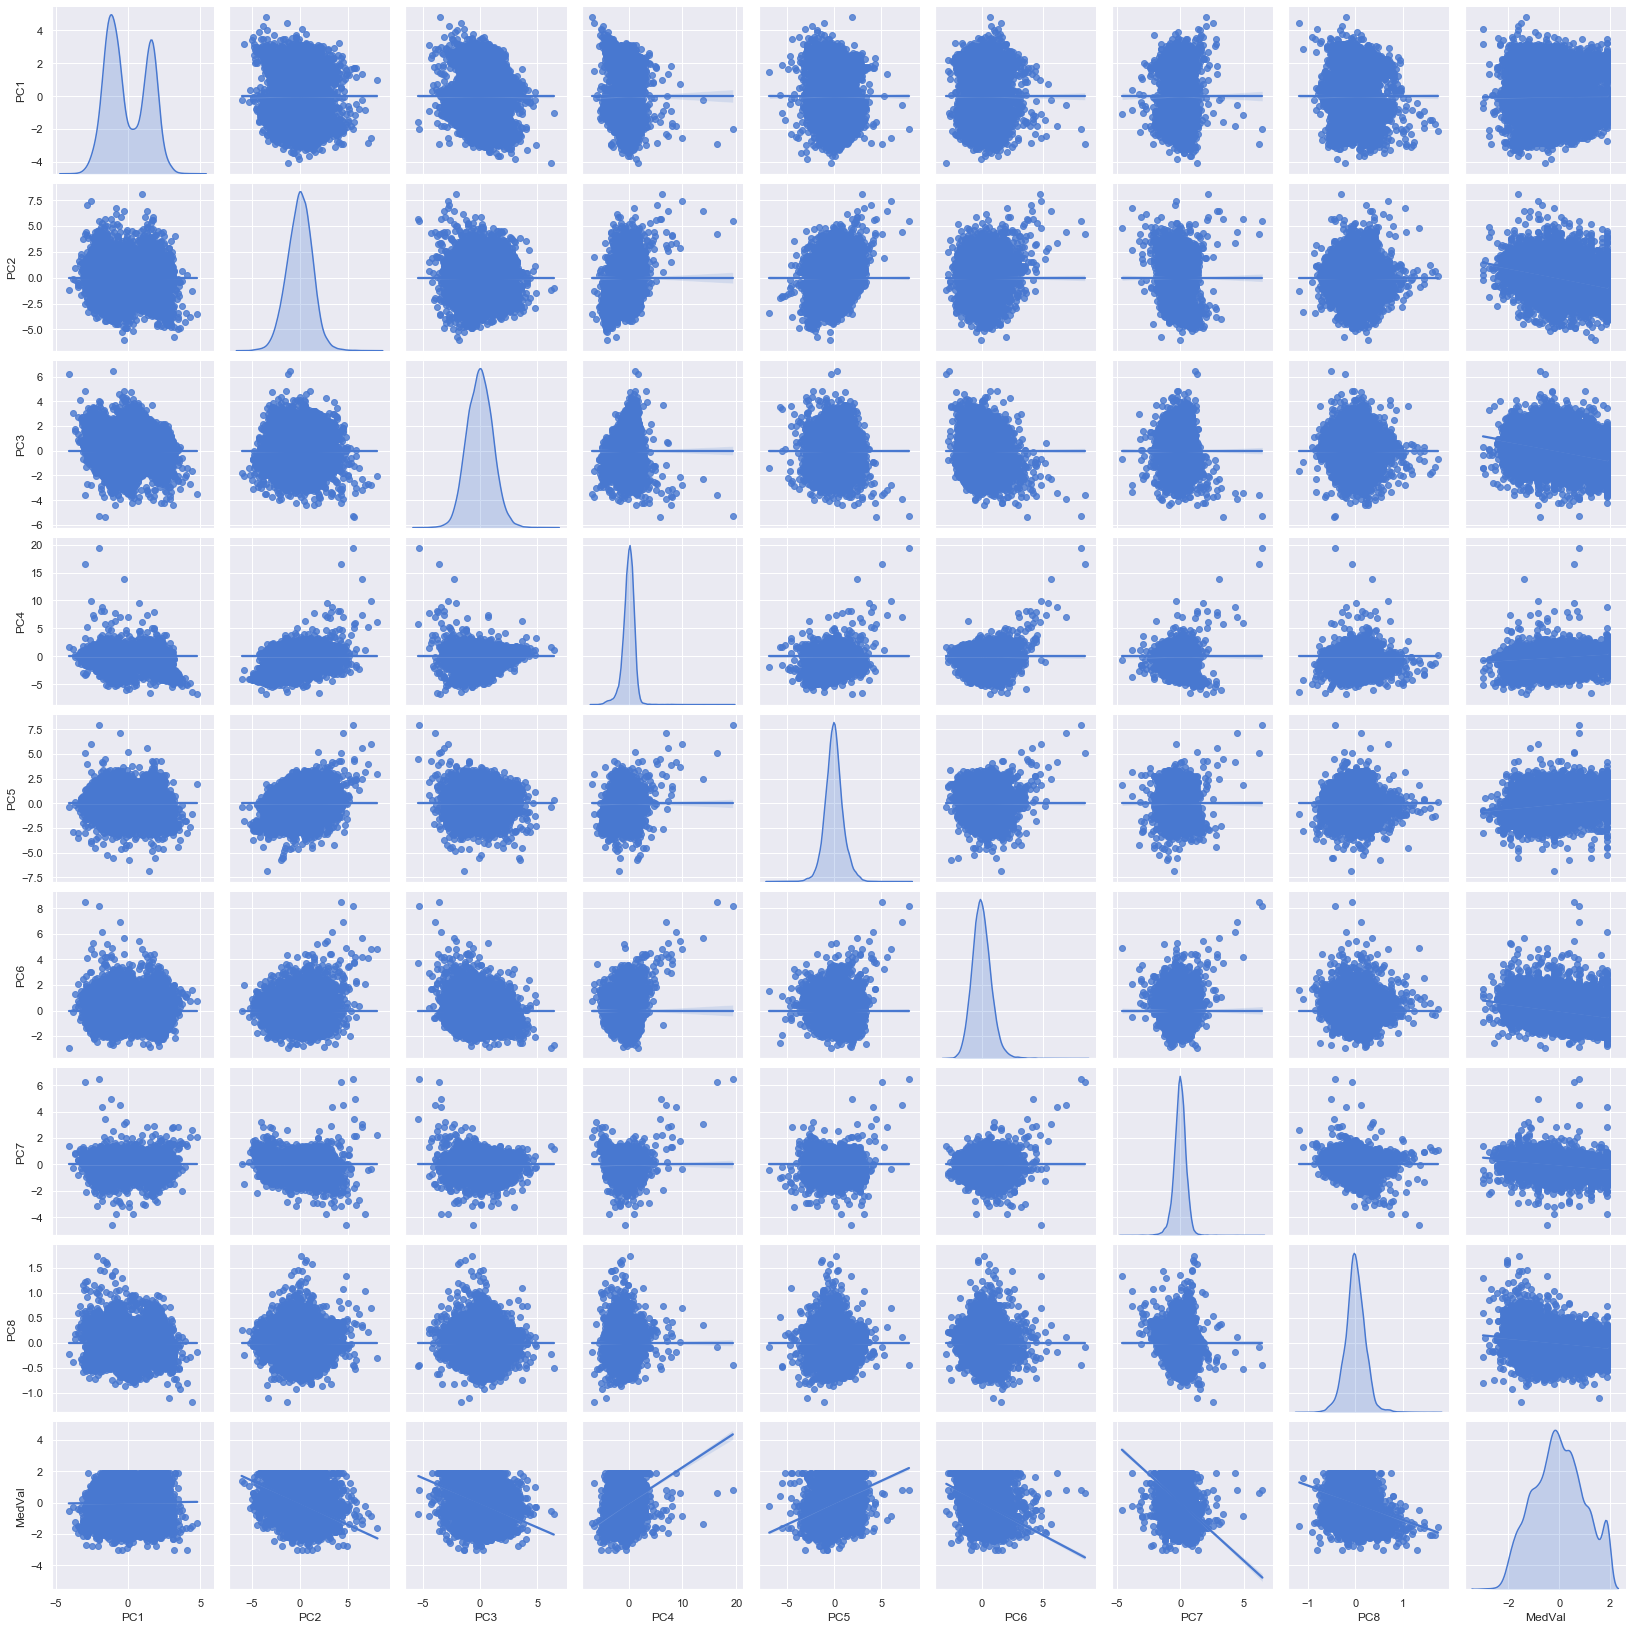

In [54]:
sns.pairplot(pca_data,kind='reg', diag_kind='kde')

The kde plots in the diagnols show that the principal components are normally distributed.

Additionally, there's no correlation between the principal components.

### Get descriptive statistics of the pca dataframe

In [55]:
pca_data.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,MedVal
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.044309e-15,-5.280401e-16,5.278938e-17,8.896845e-18,2.595967e-16,3.002820e-16,-9.511395e-18,2.823162e-17,4.548364e-16
std,1.436717e+00,1.307221e+00,1.107242e+00,1.099193e+00,9.419816e-01,7.939134e-01,4.803883e-01,2.116354e-01,1.000024e+00
min,-4.079664e+00,-6.037672e+00,-5.363526e+00,-6.718424e+00,-6.840007e+00,-2.921219e+00,-4.578829e+00,-1.179888e+00,-2.997447e+00
25%,-1.211293e+00,-8.470487e-01,-7.684092e-01,-5.412700e-01,-5.686953e-01,-5.227933e-01,-2.684922e-01,-1.242206e-01,-7.379200e-01
50%,-4.100618e-01,3.632690e-02,-6.248289e-04,1.059107e-01,-1.726455e-02,-4.623795e-02,1.603659e-02,-3.218818e-03,-1.611421e-02
75%,1.428849e+00,8.638140e-01,7.419161e-01,6.814901e-01,5.359773e-01,4.714802e-01,2.914615e-01,1.263079e-01,7.085479e-01
max,4.793707e+00,8.061784e+00,6.426060e+00,1.934727e+01,7.901719e+00,8.479454e+00,6.475347e+00,1.734679e+00,1.898584e+00


### Use data obtaind from PCA Feature Extraction for modelling

#### Get dependent and independent features from pca data

In [56]:
y_pca = pca_data['MedVal']
X_pca = pca_data.drop(['MedVal'], 1)
print(y_pca.head())
X_pca.head()

0    1.715878
1    1.281389
2    1.247506
3    1.188835
4    1.193798
Name: MedVal, dtype: float64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.339323,-1.029495,-1.833507,1.084577,-0.396658,-0.097847,-0.539559,0.062262
1,1.621925,-1.619071,0.372829,1.298967,1.685856,-0.828197,-0.078892,0.042186
2,2.333480,-1.056456,-1.692510,0.923991,-1.248685,-0.901860,-0.111544,-0.020373
3,2.165364,0.052684,-1.376361,0.622079,-0.652495,-0.908222,-0.473579,0.073094
4,2.335353,0.364186,-1.407326,-0.037753,-0.368808,-0.930169,0.270962,-0.108291


In [57]:
print(y_pca.shape)
X_pca.shape

(20640,)


(20640, 8)

#### Split data into train and test

In [58]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size = 0.2, random_state=1)

print(X_train_pca.shape)
X_train_pca.head()

(16512, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
15961,1.688477,1.170625,-0.325849,0.946242,-0.979307,-0.648526,0.040592,-0.152980
1771,1.553322,0.870921,0.001008,1.480122,-0.489899,-0.130314,0.046824,-0.088442
16414,2.417137,-1.169147,-1.141656,-2.774572,-2.485403,2.509909,-0.666439,-0.196609
5056,-1.341458,1.550055,1.325627,-1.213001,0.299044,-1.275150,0.374170,-0.152200
8589,-0.376142,-0.945602,-1.847720,0.289960,0.183644,-0.650702,-0.508092,0.055197


#### Retrain the models

In [59]:
fit_score(X_train_pca, X_test_pca, y_train_pca, y_test_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False) 

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=1, selection='cyclic',
        tol=0.0001, verbose=False) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=1, solver='auto', tol=0.001) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=Non

,Train score,Test score
LinearRegression,0.678632,0.671697
Lasso,0.000000,-0.001747
LassoCV,0.678625,0.671757
Ridge,0.678632,0.671706
ElasticNet,0.000000,-0.001747
DecisionTreeRegressor,1.000000,0.520982
RandomForestRegressor,0.968313,0.773380
XGBRegressor,0.774139,0.747374


# Cross Validation
Evaluates the model on different evalutation sets from the same dataset. Very useful when the dataset in use is small.
This is is because a lot of the data that is to be used for modelling will be put aside hence the model might not train well.

Additionally, the model might perform well in just one evaluation set which was chosen. It may perform poorly in other evaluation sets.

In this approach, the scores from the different folds are averaged. This provides a good measure of the model's performance.

An additional benefit of cross validation is that we do not need to manually check our train and test sets.

## Show all cv scores of each model and their mean scores

This is just to have more understanding of the results.

In [61]:
cv_1_scores = []
cv_2_scores = []
cv_3_scores = []
cv_4_scores = []
cv_5_scores = []
mean_cv_scores = []

cv_scores_df = pd.DataFrame(columns=['score_1','score_2','score_3','score_4','score_5', 'mean_score'], index=model_names)

kfold = KFold(n_splits=5)

for model in models:
    c_validated = cross_val_score(model, X_pca, y_pca, cv=kfold) 
    cv_1_scores.append(c_validated[0])
    cv_2_scores.append(c_validated[1])
    cv_3_scores.append(c_validated[2])
    cv_4_scores.append(c_validated[3])
    cv_5_scores.append(c_validated[4])
    accuracy = c_validated.mean()
    mean_cv_scores.append(accuracy)
    
cv_scores_df['score_1'] = cv_1_scores
cv_scores_df['score_2'] = cv_2_scores
cv_scores_df['score_3'] = cv_3_scores
cv_scores_df['score_4'] = cv_4_scores
cv_scores_df['score_5'] = cv_5_scores
cv_scores_df['mean_score'] = mean_cv_scores

mean_cv_scores.clear()

cv_scores_df

[20:37:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:37:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:37:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:37:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:37:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,score_1,score_2,score_3,score_4,score_5,mean_score
LinearRegression,0.641087,0.427091,0.650539,0.516726,0.724487,0.591986
Lasso,-0.226827,-0.078900,-0.126708,-0.077468,-0.034441,-0.108869
LassoCV,0.633679,0.438961,0.650909,0.518621,0.704989,0.589431
Ridge,0.641047,0.427130,0.650556,0.516958,0.724411,0.592020
ElasticNet,-0.226827,-0.073297,-0.126708,-0.069182,-0.034441,-0.106091
DecisionTreeRegressor,0.406850,0.032048,0.412762,0.191494,0.408641,0.290359
RandomForestRegressor,0.656684,0.516437,0.735507,0.569384,0.705887,0.636780
XGBRegressor,0.675189,0.521494,0.710187,0.589221,0.720156,0.643249


### Analyze cv outputs

For instance LinearRegression:
- Achieved a high of 72%
- Achieved a low of 42%
- The mean therefore gives us a more accurate measure of the model's performance

## Compare different values of 'KFolds'

In [62]:
mean_cv_scores = []
folds = [4, 8, 12]

cv_scores_df = pd.DataFrame(columns=['4_folds_score','8_folds_score','12_folds_score'], index=model_names)

for fold in folds:
    for model in models:
        c_validated = cross_val_score(model, X_pca, y_pca, cv=fold, n_jobs=-1) 
        accuracy = c_validated.mean()
        mean_cv_scores.append(accuracy)
        
    if fold == 4:
        cv_scores_df['4_folds_score'] = mean_cv_scores
    elif fold == 8:    
        cv_scores_df['8_folds_score'] = mean_cv_scores
    elif fold == 12:    
        cv_scores_df['12_folds_score'] = mean_cv_scores
    else:
        print('Not applicable')
        break
        
    mean_cv_scores.clear()

cv_scores_df

,4_folds_score,8_folds_score,12_folds_score
LinearRegression,0.604381,0.594195,0.487731
Lasso,-0.112504,-0.135310,-0.509893
LassoCV,0.598366,0.592743,0.482357
Ridge,0.604431,0.594244,0.487763
ElasticNet,-0.112213,-0.134587,-0.509777
DecisionTreeRegressor,0.282682,0.289772,0.132491
RandomForestRegressor,0.635682,0.646978,0.562264
XGBRegressor,0.650265,0.651552,0.555513


The cross validation scores deacrease with in an increase in the number of folds.

- The training data increases with each increase in the number of folds. This means the model is trained using more data each time. 
- The test data decreases with each increase in the number of folds. We are less likely to predict the correct values in a smaller test set. Take for instance a test set with only one value. We are less likely to predict the correct value unlike a bunch of values where we may get some correct and others wrong.

# Hyperparameter Tuning (also includes cross validation)
Hyperparameters are unique in every model. They are set on the model before fitting is done and are meant to specify how training is to be done.

The main problems to solve:
- Knowing which hyperparameters tune. 
This is because some hyperparameters are more important than others. Some also conflict with each other.

- The acceptable range of values for those hyperparameters.

The following options are available for hyperparameter tuning:
- GridSearchCV
- RandomizedSearchCV
- Bayesian Hyperparameter Tuning
- Genetic Algorithms

We'll be using the **RandomizedSearchCV** for hyperparameter tuning. It randomly selects a subset of combinations from the sample space (grid).

**best_estimator_, best_score_** and **best_params_** are methods used to anayze the best results after hyperparameter tuning is done.

**refit** parameter will fit the model with the best parameters.

**n_iter** specifies number of samples the random search will take from the grid(with hyperparameter combinations). The default is 10. The higher the value, the closer it approaches grid search. This is at the cost of runtime.

**param_distributions** allows us to specify the distribution of sampling.

In [ ]:
cv_scores = []
cv_scores_df = pd.DataFrame(columns=['Test Score'], index=model_names)

lasso_params = {'alpha': list(np.logspace(-4, 0.5, 100)),'max_iter':np.linspace(1000, 10000, 200)}
lasso_reg_params = {'max_iter':np.linspace(1000, 10000, 200)}
ridge_params = {'alpha': list(np.logspace(-4, 0.5, 100)),'max_iter':np.linspace(1000, 10000, 200)}
elastic_params = elastic_params = {'l1_ratio': list(np.linspace(0, 1, 50)),'alpha': list(np.logspace(-4, 0.5, 100)),'max_iter':np.linspace(1000, 10000, 200)}
dtr_params = {'max_depth':np.linspace(2,100,200), 'min_samples_split':list(range(2,60)),'min_samples_leaf': list(range(2,60)), 'max_leaf_nodes':[5, 25, 50, 100, 250, 500, 1000,5000]}
rfr_params = {'n_estimators': list(range(100,1100, 100)),'max_depth':np.linspace(2,100,200), 'min_samples_split':list(range(2,60))}
xgbr_params = {'n_estimators':[100,1000, 5000], 'learning_rate':list(np.linspace(0.01,1.5,200)), 'max_depth': [2, 6, 10, 14, 18]}

for model in models:
    if model == lasso:
        random = RandomizedSearchCV(model,param_distributions=lasso_params,cv=3,n_jobs=-1)
        results = random.fit(X_train_pca,y_train_pca)
        print('Lasso Best Score:', results.best_score_)
        print("Lasso Best Params:", results.best_params_)
        accuracy = results.score(X_test_pca,y_test_pca)
        cv_scores.append(accuracy)
    elif model == lasso_reg:
        random = RandomizedSearchCV(model,param_distributions=lasso_reg_params,cv=3,n_jobs=-1)
        results = random.fit(X_train_pca,y_train_pca)
        print('LassoCV Best Score:', results.best_score_)
        print("LassoCV Best Params:", results.best_params_)
        accuracy = results.score(X_test_pca,y_test_pca)
        cv_scores.append(accuracy)
    elif model == ridge_reg:    
        random = RandomizedSearchCV(model,param_distributions=ridge_params,cv=3,n_jobs=-1)
        results = random.fit(X_train_pca,y_train_pca)
        print('Ridge Best Score:', results.best_score_)
        print("Ridge Best Params:", results.best_params_)
        accuracy = results.score(X_test_pca,y_test_pca)
        cv_scores.append(accuracy)
    elif model == elastic_reg:    
        random = RandomizedSearchCV(model,param_distributions=elastic_params,cv=3,n_jobs=-1)
        results = random.fit(X_train_pca,y_train_pca)
        print('Elastic Net Best Score:', results.best_score_)
        print("Elastic Net Best Params:", results.best_params_)
        accuracy = results.score(X_test_pca,y_test_pca)
        cv_scores.append(accuracy)
    elif model == dtr:    
        random = RandomizedSearchCV(model,param_distributions=dtr_params,cv=3,n_jobs=-1)
        results = random.fit(X_train_pca,y_train_pca)
        print('DecisionTreeRegressor Best Score:', results.best_score_)
        print("DecisionTreeRegresso Best Params:", results.best_params_)
        accuracy = results.score(X_test_pca,y_test_pca)
        cv_scores.append(accuracy)
    elif model == rfr:    
        random = RandomizedSearchCV(model,param_distributions=rfr_params,cv=3,n_jobs=-1)
        results = random.fit(X_train_pca,y_train_pca)
        print('RandomForestRegressor Best Score:', results.best_score_)
        print("RandomForestRegressor Best Params:", results.best_params_)
        accuracy = results.score(X_test_pca,y_test_pca)
        cv_scores.append(accuracy)
    elif model == xgbr:    
        random = RandomizedSearchCV(model,param_distributions=xgbr_params,cv=3,n_jobs=-1)
        results = random.fit(X_train_pca, y_train_pca,early_stopping_rounds=1000,eval_set=[(X_test_pca, y_test_pca)],verbose=False) 
        print('GradientBoostingRegressor Best Score:', results.best_score_)
        print("GradientBoostingRegressor Best Params:", results.best_params_)
        accuracy = results.score(X_test_pca,y_test_pca)
        cv_scores.append(accuracy)
    else:
        c_validated = cross_val_score(model, X_train_pca, y_train_pca, cv=3)  
        accuracy = c_validated.mean()
        cv_scores.append(accuracy)
        
cv_scores_df['Test Score'] = cv_scores

cv_scores.clear()

cv_scores_df

Lasso Best Score: 0.6780336229991434
Lasso Best Params: {'max_iter': 7467.336683417086, 'alpha': 0.0001}
LassoCV Best Score: 0.6780265469509441
LassoCV Best Params: {'max_iter': 1768.8442211055276}
Ridge Best Score: 0.6780338518674721
Ridge Best Params: {'max_iter': 1271.356783919598, 'alpha': 0.11103363181676379}
Elastic Net Best Score: 0.6780184408852792
Elastic Net Best Params: {'max_iter': 2447.2361809045224, 'l1_ratio': 0.6122448979591836, 'alpha': 0.0007305271542664457}
DecisionTreeRegressor Best Score: 0.6211544947271878
DecisionTreeRegresso Best Params: {'min_samples_split': 3, 'min_samples_leaf': 31, 'max_leaf_nodes': 5000, 'max_depth': 89.65829145728644}
RandomForestRegressor Best Score: 0.7624257715197503
RandomForestRegressor Best Params: {'n_estimators': 900, 'min_samples_split': 14, 'max_depth': 51.73869346733669}


Tuning our models' hyperparameters gave us better scores in all the models. You can confirm this by checking the test scores we got during cross validation.